In [1]:
# preamble
from datetime import datetime
start = datetime.now()

#### Exercise 4.10 - Python Data Analysis
1. Import Data Sets and Libraries
2. Review security implications
3. Create a segmentation by regions in the US
4. Remove ```low activity``` users (with less than 5 orders)
5. User profiling
6. Visualizations
7. Aggregate min/mean/max
8. Compare profiles with regions and departments
9. Visualizations 
10. Data exporting and saving code,

## Step 01 >
Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [2]:
import pandas as pd
import numpy as np
import os

from pandas.api.types import CategoricalDtype 

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from  matplotlib.colors import LinearSegmentedColormap

In [3]:
# define root directory
ICpath = r'C:\Users\joseh\Instacart Basket Analysis'

# import dataset 
ords_prods_cxs_merge = pd.read_pickle(os.path.join(ICpath, '02 Data','Prepared Data','orders_products_customers.pkl'))
ords_prods_cxs_merge.shape

(32404859, 29)

## Step 02>
Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [4]:
ords_prods_cxs_merge.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order',
       'first_order_from_customer', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_label', 'busiest_day', 'Busiest_Days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'spending_flag', 'order_frequency_flag',
       'gender', 'state', 'date_joined', 'dependants', 'marital_status',
       'income', 'birth_year'],
      dtype='object')

From the columns presented there are no fields (or combination of fields) with personal identifiable information (PII)
* in a prior step I removed names so as to anonymize the data
* ```birth_year``` is generic and it was derived from year of ```date_joined``` minus ```age``` as an approximation
* the rest of the information does not give us sufficient granularity detail to pinpoint what person is a given ```user_id```
* we do not have address information, nor occupation

#### I did not find anyother fields that needed to be removed or anonymized

## Step 03 >
The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
* Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
* Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)


In [5]:
# determine what states are represented in the dataset
ords_prods_cxs_merge['state'].value_counts()

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [6]:
# based on the information of regions listed in 
#       https://www.wikiwand.com/simple/List_of_regions_of_the_United_States
# the following dictionary maps each state to its region (created easilty using Excel)

state_region = {'Alaska':'West', 'Arizona':'West', 'California':'West', 'Colorado':'West',
                'Hawaii':'West', 'Idaho':'West', 'Montana':'West', 'Nevada':'West','New Mexico':'West',
                'Oregon':'West', 'Utah':'West', 'Washington':'West', 'Wyoming':'West',
                'Alabama':'South', 'Arkansas':'South', 'Delaware':'South', 'District of Columbia':'South',
                'Florida':'South', 'Georgia':'South', 'Kentucky':'South', 'Louisiana':'South', 'Maryland':'South',
                'Mississippi':'South', 'North Carolina':'South', 'Oklahoma':'South', 'South Carolina':'South',
                'Tennessee':'South','Texas':'South', 'Virginia':'South', 'West Virginia':'South',
                'Connecticut':'Northeast', 'Maine':'Northeast', 'Massachusetts':'Northeast',
                'New Hampshire':'Northeast', 'New Jersey':'Northeast', 'New York':'Northeast',
                'Pennsylvania':'Northeast', 'Rhode Island':'Northeast', 'Vermont':'Northeast',
                'Illinois':'Midwest', 'Indiana':'Midwest', 'Iowa':'Midwest', 'Kansas':'Midwest',
                'Michigan':'Midwest','Minnesota':'Midwest', 'Missouri':'Midwest', 'Nebraska':'Midwest',
                'North Dakota':'Midwest', 'Ohio':'Midwest','South Dakota':'Midwest', 'Wisconsin':'Midwest'}

In [7]:
# use the dictionary to create a new column (list) representing the region
region=[]
for state in ords_prods_cxs_merge['state']:
    region.append(state_region[state])

# verify the size of the new list
len(region)

32404859

In [8]:
# add the new column to the data set
region_type = CategoricalDtype(['West','Midwest','South','Northeast'], ordered=True)
ords_prods_cxs_merge['region'] = region
ords_prods_cxs_merge['region'] = ords_prods_cxs_merge['region'].astype(region_type)

In [9]:
# check the added column's size and value distribution
ords_prods_cxs_merge['region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [10]:
# review spending flag created in a previous exercise
ords_prods_cxs_merge['spending_flag'].value_counts()

Low spender     32285197
High spender      119662
Name: spending_flag, dtype: int64

In [11]:
# generate a crosstab to view the distribution of spenders by region
region_vs_spending = pd.crosstab(ords_prods_cxs_merge['region'], ords_prods_cxs_merge['spending_flag'], dropna = False)

In [12]:
region_vs_spending

spending_flag,High spender,Low spender
region,,
West,31223,8261690
Midwest,29258,7568067
South,40564,10751321
Northeast,18617,5704119


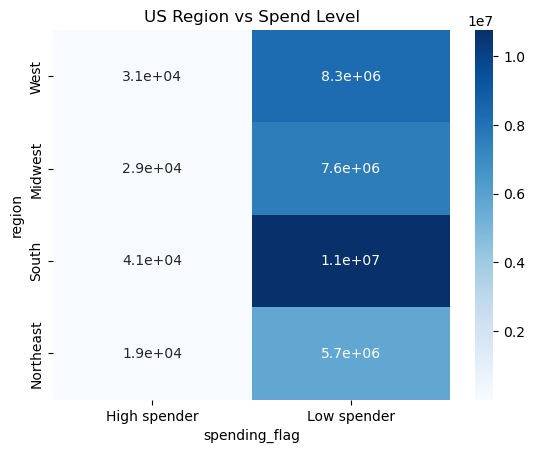

In [13]:
sns.heatmap(region_vs_spending, cmap='Blues', annot=True)
plt.title('US Region vs Spend Level')
plt.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','region_vs_spend_level.jpg'),bbox_inches='tight')

#### Based on the crosstab resuits presented the spending pattern is close to identical for all 4 regions
* ```High_spender```s represent 0.3% to 0.4% of each region
* ```Low_spender```s represent 99.6% to 99.7% of each region
* generally speaking, ```Low spender```s represent 100x the number of ```High spender```s

## Step 04 >
The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [14]:
# low_acitivity is a True/False flag that is 
#     True when the max order number is less than 5
#     False otherwise
low_activity = ords_prods_cxs_merge.groupby('user_id')['order_number'].transform('max') < 5

In [15]:
# create the new column in the data set
ords_prods_cxs_merge['low_activity'] = low_activity

In [16]:
# review the resulting operation
ords_prods_cxs_merge['low_activity'].value_counts()

False    30964564
True      1440295
Name: low_activity, dtype: int64

In [17]:
# check the distribution of the new flag
ords_prods_cxs_merge['low_activity'].value_counts()

False    30964564
True      1440295
Name: low_activity, dtype: int64

In [18]:
# finding the unique user_id's with low activity
# 1. find the entries with low_activity
# 2. extract the user_id's 
# 3. determine which entries are not duplicated and add them up
(ords_prods_cxs_merge[ords_prods_cxs_merge['low_activity']==True]['user_id'].duplicated()==False).sum()

43578

In [19]:
# create a new data frame with records that do not have low activity ( low_activity == False )
ords_prods_cxs_merge_high_activity = ords_prods_cxs_merge[ords_prods_cxs_merge['low_activity']==False]

In [20]:
ords_prods_cxs_merge_high_activity.shape

(30964564, 31)

In [21]:
# export the newly created dataframe
ords_prods_cxs_merge_high_activity.to_pickle(os.path.join(
    ICpath,'02 Data','Prepared Data','orders_products_customers_high_activity.pkl'))

## Step 05 > 
The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on ```age```, ```income```, certain goods in the ```department_id``` column, and ```number of dependents```. You might also use the ```orders_day_of_the_week``` and ```order_hour_of_day``` columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile ```Single adult``` or ```“Young parent.```)

In [22]:
# import customers to get an idea of who they are
cxs = pd.read_pickle(os.path.join(ICpath,'02 Data','Prepared Data','customers_generalized.pkl'))

In [23]:
cxs.shape

(206209, 8)

In [24]:
cxs.columns

Index(['user_id', 'gender', 'state', 'date_joined', 'dependants',
       'marital_status', 'income', 'birth_year'],
      dtype='object')

### Profiling based on department: _top_dept_: ```True```, ```False```
top_dept is the group (list) of departments that account for 80% of sales

In [25]:
# import departments (wrangled)
depts = pd.read_pickle(os.path.join(ICpath,'02 Data','Prepared Data','departments_wrangled.pkl'))
depts.shape

(21, 2)

In [26]:
depts.head()

,dept_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [27]:
pd.crosstab(ords_prods_cxs_merge['department_id'],
            ords_prods_cxs_merge.groupby('department_id')['prices'].transform('sum'),
            dropna=False)

prices,253708.00,288648.60,598845.20,770888.40,1251654.30,2068472.70,3237160.60,3579129.90,5454352.70,5644626.00,...,8053132.00,8177351.80,9208026.00,11551570.30,12345538.00,15020660.80,17289206.80,20646135.10,44979494.53,75660934.50
department_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2234743,0,0,0
2,36291,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1172428,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9479291
5,0,0,0,0,153696,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,269253,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2688123,0,0
8,0,0,0,97716,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# analysis from the crosstab above shows that the top 80% of sales derive from these 8 departments
top_departments_80pct_sales = [4,16,7,1,13,19,12,3]
for dpt in top_departments_80pct_sales:
    x = depts.loc[dpt-1].iat[1]
    print(' %2d : %s' % (dpt, x))

  4 : produce
 16 : dairy eggs
  7 : beverages
  1 : frozen
 13 : pantry
 19 : snacks
 12 : meat seafood
  3 : bakery


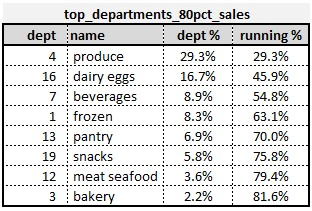

In [29]:
# create a True/False field indicating if transaction is from a top (80%) department
top_dept = []
for d in ords_prods_cxs_merge['department_id']:
    if d in top_departments_80pct_sales:
        top_dept.append(True)
    else:
        top_dept.append(False)
        
len(top_dept)

32404859

In [30]:
ords_prods_cxs_merge['top_dept'] = top_dept

In [31]:
# double check to make sure the classification correctly places 80% in top_dept 
# actually 81% of all sales = 2.067e+08 / (2.067e+08 + 4.574e+07)
ords_prods_cxs_merge.groupby('top_dept')['prices'].transform('sum').value_counts()

2.067016e+08    26445178
4.574792e+07     5959681
Name: prices, dtype: int64

### Profiling based on age: ```young_adult```, ```adult```, ```mature```, ```senior```

In [32]:
# determine the age at the time this code is run
# previosuly the customers dataset was saved with birth_year 
# while the fields 'birhdate' and 'age' were removed to have the data anonymized removing PII

current_yr = datetime.now().year # get the current year at run time
ords_prods_cxs_merge['age'] = current_yr - ords_prods_cxs_merge['birth_year']

In [33]:
# define a new column 'age group' as follows
# 21-34 - young_adult
# 35-44 - adult
# 45-64 - mature
# 65+   - senior
ords_prods_cxs_merge.loc[ords_prods_cxs_merge['age'] < 35, 'age_group'] = 'young_adult'
ords_prods_cxs_merge.loc[(ords_prods_cxs_merge['age']>=35)&(ords_prods_cxs_merge['age']<45), 'age_group'] = 'adult'
ords_prods_cxs_merge.loc[(ords_prods_cxs_merge['age']>=45)&(ords_prods_cxs_merge['age']<65), 'age_group'] = 'mature'
ords_prods_cxs_merge.loc[ords_prods_cxs_merge['age'] >= 65, 'age_group'] = 'senior'

age_group_type = CategoricalDtype(['young_adult','adult','mature','senior'], ordered=True)
ords_prods_cxs_merge['age_group'] = ords_prods_cxs_merge['age_group'].astype(age_group_type)

In [34]:
# verify the results to be ok with the following crosstab
# ( pd.crosstab(ords_prods_cxs_merge['age_group'], ords_prods_cxs_merge['age'], dropna=False) ).to_clipboard()

In [35]:
status_type = CategoricalDtype(['living with parents and siblings','single','married','divorced/widowed'], ordered=True)
ords_prods_cxs_merge['marital_status'] = ords_prods_cxs_merge['marital_status'].astype(status_type)

In [36]:
# assess the assignment of age vs marital status with a crosstab
marital_status_vs_age = pd.crosstab(ords_prods_cxs_merge['marital_status'],ords_prods_cxs_merge['age_group'],dropna=False)

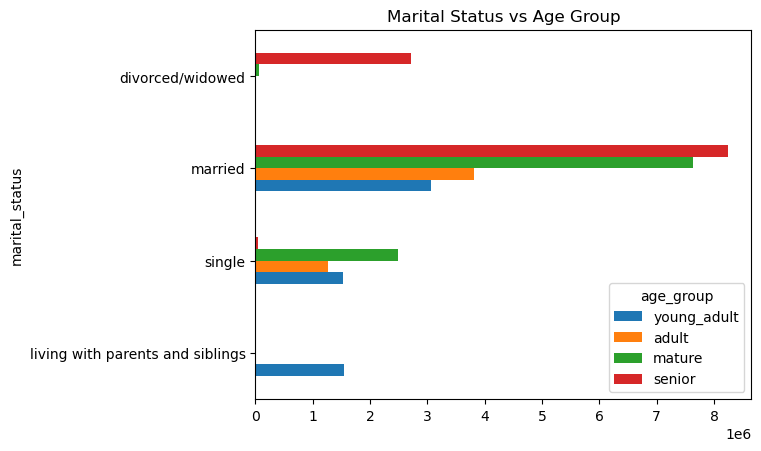

In [37]:
marital_status_vs_age.plot.barh(title='Marital Status vs Age Group')
plt.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','marital_status_vs_age_barh.jpg'),bbox_inches='tight')

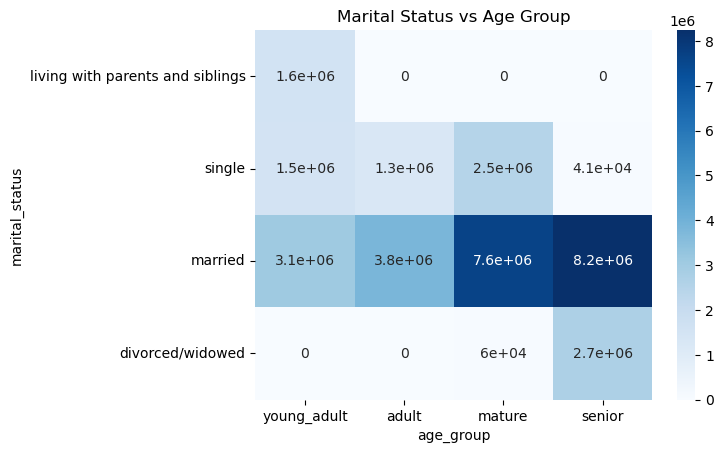

In [38]:
# displat the crosstab as a heatmap
sns.heatmap(marital_status_vs_age, cmap='Blues', annot=True)
plt.title('Marital Status vs Age Group')
plt.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','marital_status_vs_age.jpg'),bbox_inches='tight')

In [39]:
# crosstab to analyze marital status VS number of dependants
marital_status_vs_dependants=pd.crosstab(ords_prods_cxs_merge['marital_status'],ords_prods_cxs_merge['dependants'],dropna=False)

In [40]:
marital_status_vs_dependants

dependants,0,1,2,3
marital_status,,,,
living with parents and siblings,0,530200,507963,512440
single,5325691,0,0,0
married,0,7550904,7583180,7622669
divorced/widowed,2771812,0,0,0


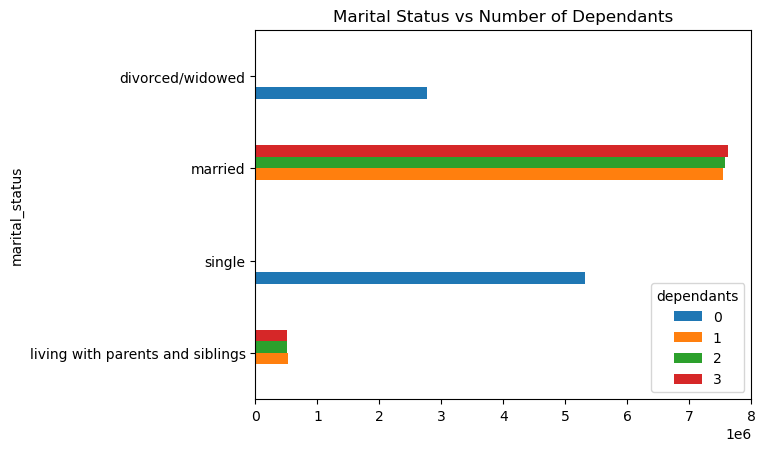

In [41]:
# create a horizontal bar figure of marital status VS number of dependants
marital_status_vs_dependants.plot(kind='barh', title='Marital Status vs Number of Dependants')
plt.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','marital_status_vs_dependants_barh.jpg'),bbox_inches='tight')

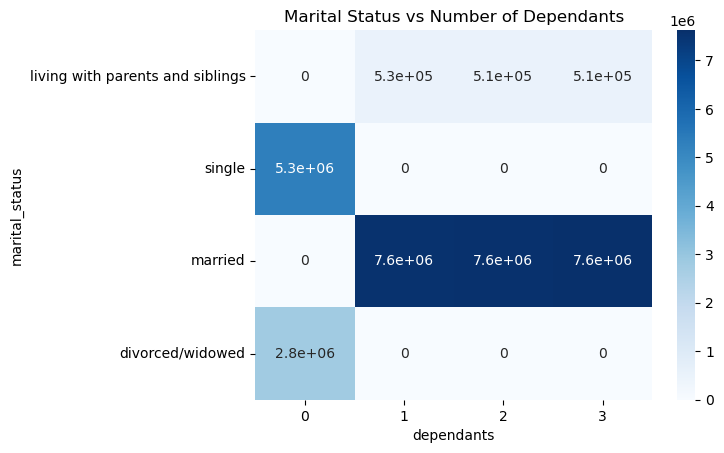

In [42]:
# create a heatmap of marital status VS number of dependants
sns.heatmap(marital_status_vs_dependants, cmap='Blues', annot=True)
plt.title('Marital Status vs Number of Dependants')
plt.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','marital_status_vs_dependants.jpg'),bbox_inches='tight')

### Profiling based on income levels: 
* ```low```: up to 50K
* ```medium```: 50K to 100K
* ```high```: 100K to 250K
* ```affluent```: 250K and above

In [43]:
# analyze the distribution of income
ords_prods_cxs_merge['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [44]:
# create income level as follows 
#  low    : < 50,000
#  medium :  50,000 to < 100,000
#  high   : 100,000 to < 250,000
#  affluent   : 250,000 and up
ords_prods_cxs_merge.loc[ords_prods_cxs_merge['income'] < 50000,'income_level']='low'
ords_prods_cxs_merge.loc[(ords_prods_cxs_merge['income']>=50000)&(ords_prods_cxs_merge['income'] <100000),'income_level']='medium'
ords_prods_cxs_merge.loc[(ords_prods_cxs_merge['income']>=100000)&(ords_prods_cxs_merge['income'] <250000),'income_level']='high'
ords_prods_cxs_merge.loc[ords_prods_cxs_merge['income'] >=250000,'income_level']='affluent'

income_lvl_type = CategoricalDtype(['low','medium','high','affluent'], ordered=True)
ords_prods_cxs_merge['income_level'] = ords_prods_cxs_merge['income_level'].astype(income_lvl_type)

In [45]:
# review the distriburion of the newly created field
ords_prods_cxs_merge['income_level'].value_counts()

high        14632186
medium      13996010
low          3594083
affluent      182580
Name: income_level, dtype: int64

In [46]:
# analyze income level vs age group using a crosstab
income_vs_age = pd.crosstab(ords_prods_cxs_merge['income_level'],ords_prods_cxs_merge['age_group'],dropna=False)
income_vs_age

age_group,young_adult,adult,mature,senior
income_level,,,,
low,969707,801420,893706,929250
medium,4989183,4093291,2509631,2403905
high,177226,174476,6694443,7586041
affluent,15954,14334,76746,75546


In [47]:
# similar crosstab  ## NOTE: I did not know if it is possible to transpose a crosstab
age_vs_income = pd.crosstab(ords_prods_cxs_merge['age_group'],ords_prods_cxs_merge['income_level'],dropna=False)
age_vs_income

income_level,low,medium,high,affluent
age_group,,,,
young_adult,969707,4989183,177226,15954
adult,801420,4093291,174476,14334
mature,893706,2509631,6694443,76746
senior,929250,2403905,7586041,75546


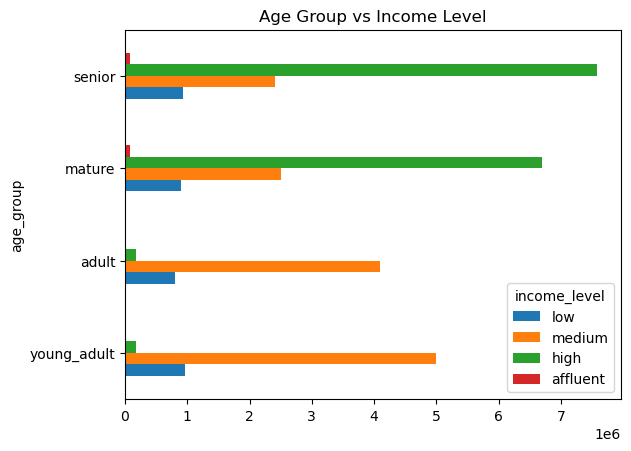

In [48]:
# plot a horizontal bar graph os age VS income
age_vs_income.plot.barh(title='Age Group vs Income Level')
plt.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','age_vs_income_barh.jpg'),bbox_inches='tight')

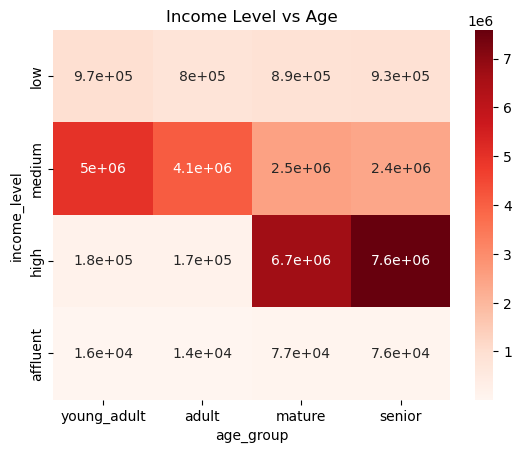

In [49]:
# create a heatmap to see the distribution of income level vs. age group
sns.heatmap(income_vs_age, annot=True, cmap='Reds')
plt.title('Income Level vs Age')
plt.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','income_level_vs_age.jpg'),bbox_inches='tight')

### Create a new column to derive new profile of customers
* ```young_parent```: ( young_adult or adult ) and married and 2 or more dependants
* ```older_parent```: ( mature or senior ) and married and 2 or more dependants
* ```young_married_nokids```: ( yound_adult or adult ) and married and 0 or 1 dependants
* ```older_married_nokids```: ( mature or senior ) and married and 0 or 1 dependants
* ```young_single```: ( young_adult or adult) and not married
* ```older_single```: ( mature or senior ) and not married

In [50]:
ords_prods_cxs_merge.loc[((ords_prods_cxs_merge['age_group']=='young_adult')&
                          (ords_prods_cxs_merge['marital_status']=='married')&
                          (ords_prods_cxs_merge['dependants']>1)),
                         'cx_profile'] = 'young_parent'
ords_prods_cxs_merge.loc[((ords_prods_cxs_merge['age_group']=='adult')&
                          (ords_prods_cxs_merge['marital_status']=='married')&
                          (ords_prods_cxs_merge['dependants']>1)),
                         'cx_profile'] = 'young_parent'
ords_prods_cxs_merge.loc[((ords_prods_cxs_merge['age_group']=='mature')&
                          (ords_prods_cxs_merge['marital_status']=='married')&
                          (ords_prods_cxs_merge['dependants']>1)),
                         'cx_profile'] = 'older_parent'
ords_prods_cxs_merge.loc[((ords_prods_cxs_merge['age_group']=='senior')&
                          (ords_prods_cxs_merge['marital_status']=='married')&
                          (ords_prods_cxs_merge['dependants']>1)),
                         'cx_profile'] = 'older_parent'
ords_prods_cxs_merge.loc[((ords_prods_cxs_merge['age_group']=='young_adult')&
                          (ords_prods_cxs_merge['marital_status']!='married')),
                         'cx_profile'] = 'young_single'
ords_prods_cxs_merge.loc[((ords_prods_cxs_merge['age_group']=='adult')&
                          (ords_prods_cxs_merge['marital_status']!='married')),
                         'cx_profile'] = 'young_single'
ords_prods_cxs_merge.loc[((ords_prods_cxs_merge['age_group']=='mature')&
                          (ords_prods_cxs_merge['marital_status']!='married')),
                         'cx_profile'] = 'older_single'
ords_prods_cxs_merge.loc[((ords_prods_cxs_merge['age_group']=='senior')&
                          (ords_prods_cxs_merge['marital_status']!='married')),
                         'cx_profile'] = 'older_single'
ords_prods_cxs_merge.loc[((ords_prods_cxs_merge['age_group']=='young_adult')&
                          (ords_prods_cxs_merge['marital_status']=='married')&
                          (ords_prods_cxs_merge['dependants']<=1)),
                         'cx_profile'] = 'young_married_nokids'
ords_prods_cxs_merge.loc[((ords_prods_cxs_merge['age_group']=='adult')&
                          (ords_prods_cxs_merge['marital_status']=='married')&
                          (ords_prods_cxs_merge['dependants']<=1)),
                         'cx_profile'] = 'young_married_nokids'
ords_prods_cxs_merge.loc[((ords_prods_cxs_merge['age_group']=='mature')&
                          (ords_prods_cxs_merge['marital_status']=='married')&
                          (ords_prods_cxs_merge['dependants']<=1)),
                         'cx_profile'] = 'older_married_nokids'
ords_prods_cxs_merge.loc[((ords_prods_cxs_merge['age_group']=='senior')&
                          (ords_prods_cxs_merge['marital_status']=='married')&
                          (ords_prods_cxs_merge['dependants']<=1)),
                         'cx_profile'] = 'older_married_nokids'

# verify the assignments covered all the records
ords_prods_cxs_merge['cx_profile'].value_counts(dropna=False)

older_parent            10589604
older_single             5297305
older_married_nokids     5282359
young_parent             4616245
young_single             4350801
young_married_nokids     2268545
Name: cx_profile, dtype: int64

## Step 06 > 
Create an appropriate visualization to show the distribution of profiles.

In [51]:
cx_vs_income =pd.crosstab(ords_prods_cxs_merge['cx_profile'],ords_prods_cxs_merge['income_level'])

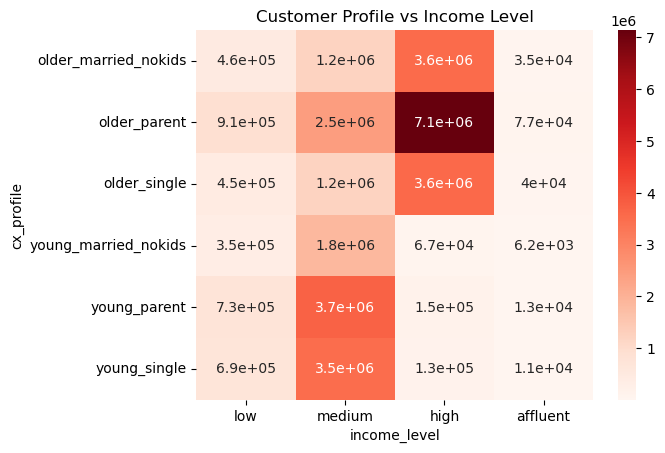

In [52]:
sns.heatmap(cx_vs_income,cmap='Reds',annot=True)
plt.title('Customer Profile vs Income Level')
plt.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','cx_profiles_vs_income.jpg'),bbox_inches='tight')

In [53]:
income_vs_top_dept =pd.crosstab(ords_prods_cxs_merge['income_level'],ords_prods_cxs_merge['top_dept'])

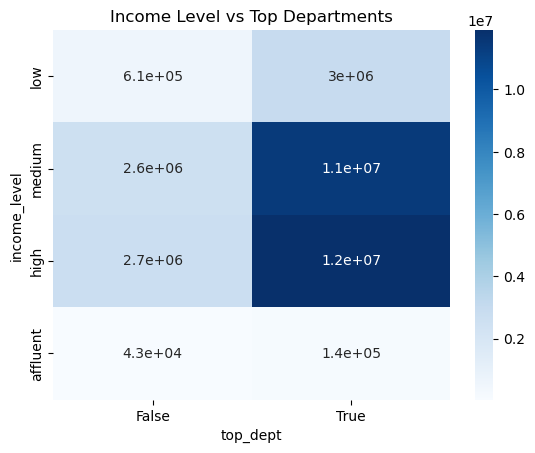

In [54]:
sns.heatmap(income_vs_top_dept,cmap='Blues',annot=True)
plt.title('Income Level vs Top Departments')
plt.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','income_vs_top_depts.jpg'),bbox_inches='tight')

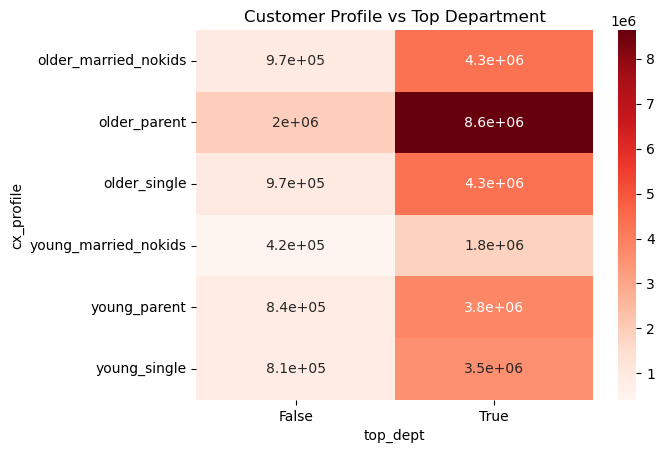

In [55]:
cx_vs_top_dept =pd.crosstab(ords_prods_cxs_merge['cx_profile'],ords_prods_cxs_merge['top_dept'])
sns.heatmap( cx_vs_top_dept, cmap='Reds', annot=True)
plt.title('Customer Profile vs Top Department')
plt.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','customers_vs_top_depts.jpg'),bbox_inches='tight')

## Step 07 >
Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [56]:
ords_prods_cxs_merge.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order',
       'first_order_from_customer', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_label', 'busiest_day', 'Busiest_Days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'spending_flag', 'order_frequency_flag',
       'gender', 'state', 'date_joined', 'dependants', 'marital_status',
       'income', 'birth_year', 'region', 'low_activity', 'top_dept', 'age',
       'age_group', 'income_level', 'cx_profile'],
      dtype='object')

#### usage frequency is based on ```days_since_prior_order```

In [57]:
pd.crosstab(ords_prods_cxs_merge['cx_profile'],ords_prods_cxs_merge.groupby('cx_profile')['days_since_prior_order'].transform('mean'))

days_since_prior_order,11.030454,11.086215,11.102701,11.124212,11.124711,11.130495
cx_profile,,,,,,
older_married_nokids,0,0,0,0,5282359,0
older_parent,0,0,0,10589604,0,0
older_single,5297305,0,0,0,0,0
young_married_nokids,0,2268545,0,0,0,0
young_parent,0,0,4616245,0,0,0
young_single,0,0,0,0,0,4350801


#### expenditure is based on the sum of ```prices```

In [58]:
pd.crosstab(ords_prods_cxs_merge['cx_profile'],ords_prods_cxs_merge.groupby('cx_profile')['prices'].transform('sum'))

prices,17690643.05,33880221.86,35908679.25,41170284.01,41290319.05,82509342.61
cx_profile,,,,,,
older_married_nokids,0,0,0,5282359,0,0
older_parent,0,0,0,0,0,10589604
older_single,0,0,0,0,5297305,0
young_married_nokids,2268545,0,0,0,0,0
young_parent,0,0,4616245,0,0,0
young_single,0,4350801,0,0,0,0


## Step 08 >
Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [59]:
cx_vs_region =pd.crosstab(ords_prods_cxs_merge['cx_profile'],ords_prods_cxs_merge['region'])

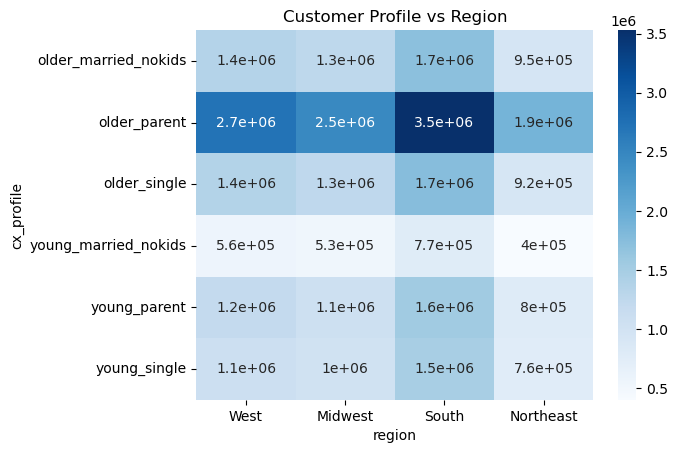

In [60]:
sns.heatmap(cx_vs_region,cmap='Blues',annot=True)
plt.title('Customer Profile vs Region')
plt.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','cx_profiles_vs_region.jpg'),bbox_inches='tight')

In [61]:
ords_prods_cxs_merge['region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [62]:
cx_vs_top_dept =pd.crosstab(ords_prods_cxs_merge['cx_profile'],ords_prods_cxs_merge['top_dept'])

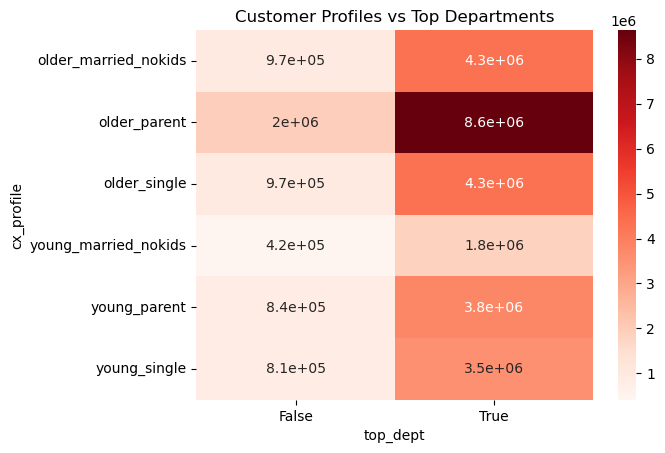

In [63]:
sns.heatmap(cx_vs_top_dept, cmap='Reds', annot=True)
plt.title('Customer Profiles vs Top Departments')
plt.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','cx_profiles_vs_top_depts.jpg'),bbox_inches='tight')

## Step 09 > 
Produce suitable charts to illustrate your results and export them in your project folder.

#### From Steps 05 to 08 I saved figures that created for visualizing the distribution of the variables used for profiling. 
#### The list of images is in the directory ```/04 Analysis/Visualizations```:
* age_vs_income_barh.jpg
* bar_orders_dow.png.png
* customers_vs_top_depts.jpg
* cx_profile_order_frequency.jpg
* cx_profile_vs_price.jpg
* cx_profiles_vs_income.jpg
* cx_profiles_vs_region.jpg
* cx_profiles_vs_top_depts.jpg
* day_vs_hr_activity.jpg
* income_level_vs_age.jpg
* income_vs_top_depts.jpg
* loyalty_vs_region.jpg
* marital_status_vs_age.jpg
* marital_status_vs_age_barh.jpg
* marital_status_vs_dependants.jpg
* marital_status_vs_dependants_barh.jpg
* region_vs_spend_level.jpg
* sales_income_vs_age.jpg
* sales_marital_status_vs_age.jpg
* spend_by_hour_of_day.jpg

### < Additional Insights >

#### Activity Heatmap showing busiest day of week and hour of day

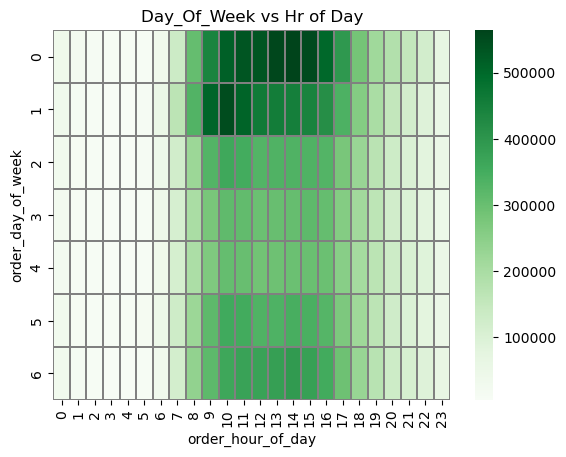

In [64]:
xtab_day_hr = pd.crosstab(ords_prods_cxs_merge['order_day_of_week'],ords_prods_cxs_merge['order_hour_of_day'])
sns.heatmap(xtab_day_hr, cmap='Greens',linewidths=0.01, linecolor='gray')
plt.title('Day_Of_Week vs Hr of Day')
plt.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','day_vs_hr_activity.jpg'),bbox_inches='tight')

#### Determining the distribution of ```total spend``` as sum of ```prices``` by ```hour_of_day```

In [65]:
spend_sum_by_hr = ords_prods_cxs_merge.groupby('order_hour_of_day')['prices'].transform('sum')
hour_list = ords_prods_cxs_merge['order_hour_of_day'] = ords_prods_cxs_merge['order_hour_of_day']

In [66]:
hour_by_spend = pd.DataFrame()
hour_by_spend['hours']=hour_list
hour_by_spend['spend']=spend_sum_by_hr
hour_by_spend2 = hour_by_spend.loc[hour_by_spend.duplicated()==False].sort_values(by=['hours'])
hour_by_spend2.set_index('hours',inplace=True)

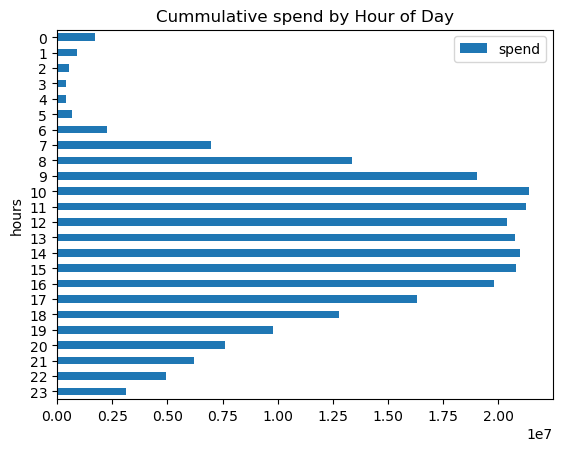

In [67]:
hour_by_spend2.plot.barh()
plt.title('Cummulative spend by Hour of Day')
plt.gca().invert_yaxis()
plt.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','spend_by_hour_of_day.jpg'),bbox_inches='tight')

#### Determining the distribution of ```price_label```

In [68]:
ords_prods_cxs_merge['price_label'].value_counts()

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_label, dtype: int64

#### Determining the distribution of ```loyalty_flag``` 

In [69]:
ords_prods_cxs_merge['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

#### Determining the average number of days between orders by ```loyalty_flag``` category

In [70]:
loyalty_vs_mtb_orders = pd.DataFrame()
loyalty_vs_mtb_orders['loyalty'] = ords_prods_cxs_merge['loyalty_flag']
loyalty_vs_mtb_orders['mtb_orders'] = ords_prods_cxs_merge.groupby('loyalty_flag')['days_since_prior_order'].transform('mean')

In [71]:
loyalty_vs_mtb_orders2 = loyalty_vs_mtb_orders.loc[loyalty_vs_mtb_orders.duplicated()==False]
loyalty_vs_mtb_orders2

,loyalty,mtb_orders
0,New customer,17.976936
59,Regular customer,12.155135
1557,Loyal customer,6.026656


#### Determining distribution by region

In [72]:
loyalty_type = CategoricalDtype(['New customer','Regular customer','Loyal customer'], ordered=True)
ords_prods_cxs_merge['loyalty_flag'] = ords_prods_cxs_merge['loyalty_flag'].astype(loyalty_type)
region_vs_loyalty = pd.crosstab(ords_prods_cxs_merge['loyalty_flag'],ords_prods_cxs_merge['region'],dropna=False)

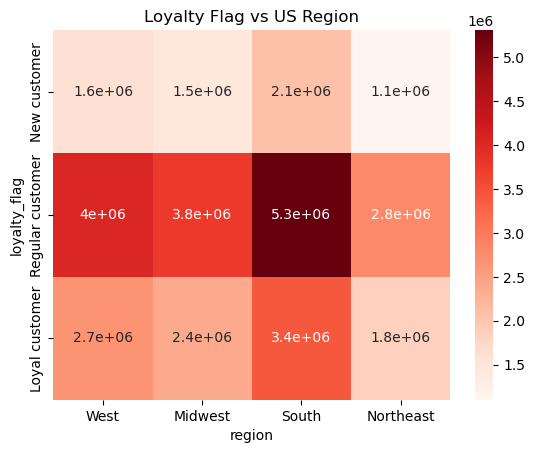

In [73]:
sns.heatmap(region_vs_loyalty,cmap="Reds",annot=True)
plt.title('Loyalty Flag vs US Region')
plt.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','loyalty_vs_region.jpg'),bbox_inches='tight')

#### ```age_group``` vs ```marital_status``` (or Family Status) analysis of sales (as sum of ```prices```)

In [74]:
sales_family_vs_age=ords_prods_cxs_merge.pivot_table(index='marital_status', columns='age_group',values='prices',aggfunc='sum')

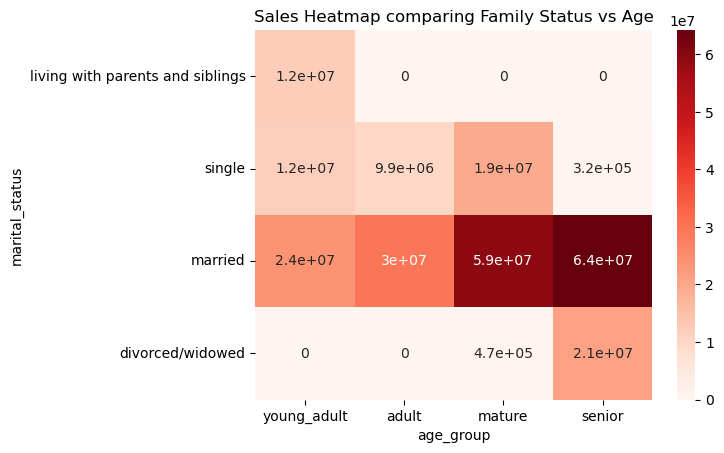

In [75]:
sns.heatmap(sales_family_vs_age, annot=True, cmap='Reds')
plt.title('Sales Heatmap comparing Family Status vs Age')
plt.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','sales_marital_status_vs_age.jpg'),bbox_inches='tight')

#### ```income_level``` vs ```age_group``` analysis of sales (as sum of ```prices```)

In [76]:
sales_income_vs_age = ords_prods_cxs_merge.pivot_table(index='income_level', columns='age_group',values='prices',aggfunc='sum')

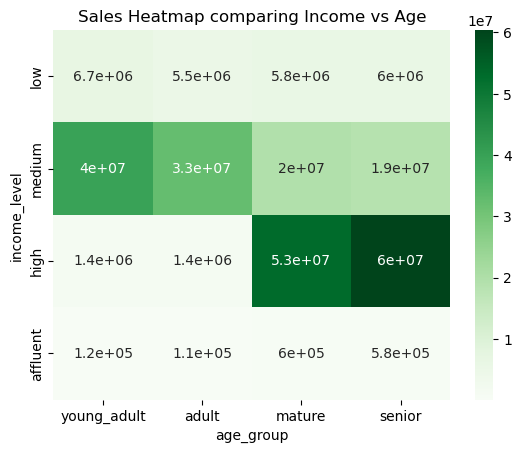

In [77]:
sns.heatmap(sales_income_vs_age, annot=True, cmap='Greens')
plt.title('Sales Heatmap comparing Income vs Age')
plt.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','sales_income_vs_age.jpg'),bbox_inches='tight')

#### Comparison of ```cx_profile``` (customer profiles) vs ```prices``` and frequency of orders (based on ```days_since_prior_order```)

In [78]:
pricelvl_type = CategoricalDtype(['Low-range product','Mid-range product','High-range product'], ordered=True)
ords_prods_cxs_merge['price_label'] = ords_prods_cxs_merge['price_label'].astype(pricelvl_type)
cx_profile_vs_price_level = ords_prods_cxs_merge.pivot_table(index='cx_profile',
                                                             columns='price_label',
                                                             values='prices',
                                                             aggfunc='sum')

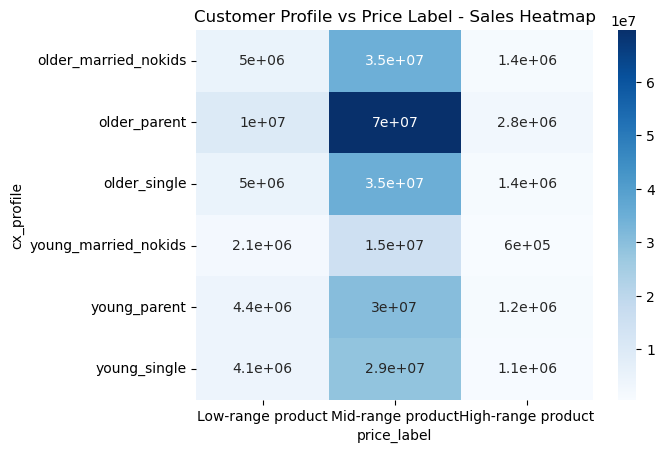

In [79]:
sns.heatmap(cx_profile_vs_price_level, annot=True, cmap='Blues')
plt.title('Customer Profile vs Price Label - Sales Heatmap')
plt.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','cx_profile_vs_price.jpg'),bbox_inches='tight')

In [80]:
freqflag_type = CategoricalDtype(['Non-frequent customer','Regular customer','Frequent customer'], ordered=True)
ords_prods_cxs_merge['order_frequency_flag'] = ords_prods_cxs_merge['order_frequency_flag'].astype(freqflag_type)
cx_profile_order_frequency = ords_prods_cxs_merge.pivot_table(index='cx_profile',
                                                              columns='order_frequency_flag',
                                                              values='prices',
                                                              aggfunc='sum')

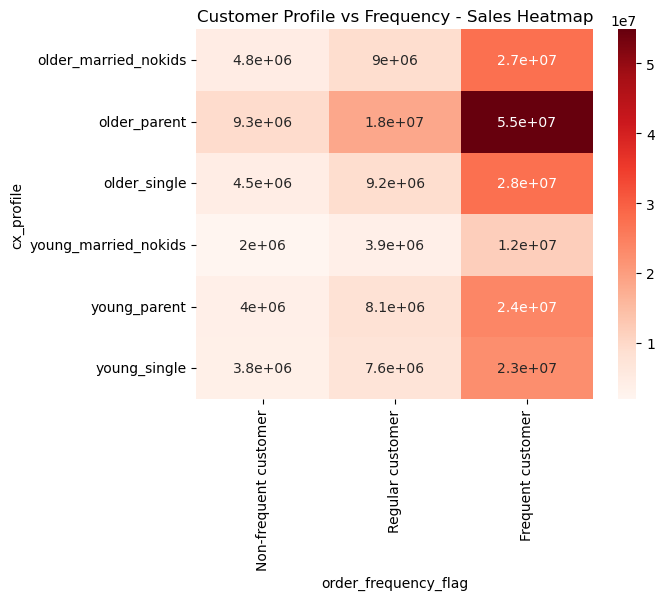

In [81]:
sns.heatmap(cx_profile_order_frequency, annot=True, cmap='Reds')
plt.title('Customer Profile vs Frequency - Sales Heatmap')
plt.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','cx_profile_order_frequency.jpg'),bbox_inches='tight')

## Step 10 >
Tidy up your script, export your final data set, and save your notebook.

In [82]:
# save the data set with all newly created fields to help with segmentation and profiling
ords_prods_cxs_merge.to_pickle(os.path.join(ICpath,'02 Data','Prepared Data','ords_prods_cxs_profiles_segmentation.pkl'))

In [83]:
# fyi only - to track performance of this notebook 
print(' time to run this notebook h:mm:ss: ', datetime.now() - start)

 time to run this notebook h:mm:ss:  0:03:47.953214


#### final check

In [84]:
ords_prods_cxs_merge.shape

(32404859, 36)

In [85]:
ords_prods_cxs_merge.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order',
       'first_order_from_customer', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_label', 'busiest_day', 'Busiest_Days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'spending_flag', 'order_frequency_flag',
       'gender', 'state', 'date_joined', 'dependants', 'marital_status',
       'income', 'birth_year', 'region', 'low_activity', 'top_dept', 'age',
       'age_group', 'income_level', 'cx_profile'],
      dtype='object')